In [48]:
pip install ppscore

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl.metadata (12 kB)
   ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.3 MB 1.6 MB/s eta 0:00:07
    --------------------------------------- 0.2/10.3 MB 1.9 MB/s eta 0:00:06
   - -------------------------------------- 0.3/10.3 MB 2.4 MB/s eta 0:00:05
   - -------------------------------------- 0.5/10.3 MB 2.6 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/10.3 MB 3.6 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/10.3 MB 5.2 MB/s eta 0:00:02
   ------- -------------------------------- 1.9/10.3 MB 5.9 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/10.3 MB 6.7 MB/s eta 0:00:02
   ----------- ---------------------------- 3.0/10.3 MB 7.2 MB/s eta 0:00:02
   ----------- ---------------------------- 3.0/10.3 MB 7.4 MB/s

  You can safely remove it manually.


In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
import statistics as st
import numpy as np
import ppscore as pps
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading the Dataset
Data = pd.read_csv("adult_with_headers.csv")

In [4]:
#Viewing the dataset
Data.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
#Knowing the info about the table
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [18]:
# Value Counts for Categorical Features
print(Data['workclass'].value_counts())
print(Data['education'].value_counts())
print(Data['marital_status'].value_counts())
print(Data['occupation'].value_counts())
print(Data['income'].value_counts())

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64
education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64
marital_status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64
occupation
 Prof-specialty       4140
 Craft-repair 

In [3]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data

Data['marital_status'] = label_encoder.fit_transform(Data['marital_status'])

Data['workclass'] = label_encoder.fit_transform(Data['workclass'])

Data['education'] = label_encoder.fit_transform(Data['education'])

Data['sex'] = label_encoder.fit_transform(Data['sex'])

Data['occupation'] = label_encoder.fit_transform(Data['occupation'])

Data['income'] = label_encoder.fit_transform(Data['income'])

In [20]:
Data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,Not-in-family,White,1,2174,0,40,United-States,0
1,50,6,83311,9,13,2,4,Husband,White,1,0,0,13,United-States,0
2,38,4,215646,11,9,0,6,Not-in-family,White,1,0,0,40,United-States,0
3,53,4,234721,1,7,2,6,Husband,Black,1,0,0,40,United-States,0
4,28,4,338409,9,13,2,10,Wife,Black,0,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,Wife,White,0,0,0,38,United-States,0
32557,40,4,154374,11,9,2,7,Husband,White,1,0,0,40,United-States,1
32558,58,4,151910,11,9,6,1,Unmarried,White,0,0,0,40,United-States,0
32559,22,4,201490,11,9,4,1,Own-child,White,1,0,0,20,United-States,0


In [4]:
#Dropping Relationship column becoz we can know that there will be no dependency between salary and relationship
Data = Data.drop("relationship",axis=1)

In [5]:
#Dropping Race,native_country column becoz no one will salary depending on what color they are and where they from
Data = Data.drop("race",axis=1)

In [6]:
Data = Data.drop("native_country",axis=1)

In [27]:
Data.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,sex,capital_gain,capital_loss,hours_per_week,income
0,39,7,77516,9,13,4,1,1,2174,0,40,0
1,50,6,83311,9,13,2,4,1,0,0,13,0
2,38,4,215646,11,9,0,6,1,0,0,40,0
3,53,4,234721,1,7,2,6,1,0,0,40,0
4,28,4,338409,9,13,2,10,0,0,0,40,0


In [7]:
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(Data)
# predictions
y_pred_outliers = clf.predict(Data)
y_pred_outliers

C:\Users\gjernes\AppData\Local\anaconda3_\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1])

In [8]:
# decision_function = 0.5- anomaly_score
clf.decision_function(Data)

array([0.103205  , 0.14183693, 0.20597032, ..., 0.14583719, 0.16599543,
       0.04559784])

In [9]:
#Adding Anomaly values in the table
Data['anomaly']=clf.predict(Data.iloc[:,0:12])

In [10]:
Data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,sex,capital_gain,capital_loss,hours_per_week,income,anomaly
0,39,7,77516,9,13,4,1,1,2174,0,40,0,1
1,50,6,83311,9,13,2,4,1,0,0,13,0,1
2,38,4,215646,11,9,0,6,1,0,0,40,0,1
3,53,4,234721,1,7,2,6,1,0,0,40,0,1
4,28,4,338409,9,13,2,10,0,0,0,40,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,0,0,0,38,0,1
32557,40,4,154374,11,9,2,7,1,0,0,40,1,1
32558,58,4,151910,11,9,6,1,0,0,0,40,0,1
32559,22,4,201490,11,9,4,1,1,0,0,20,0,1


In [11]:
#Print the outlier data points
Outliers = Data[Data['anomaly']==-1]

In [12]:
Outliers


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,sex,capital_gain,capital_loss,hours_per_week,income,anomaly
106,17,0,304873,0,6,4,0,0,34095,0,32,0,-1
157,71,6,494223,15,10,5,12,1,0,1816,2,0,-1
160,68,0,38317,3,2,0,0,0,0,0,20,0,-1
226,60,0,24215,0,6,0,0,0,0,0,10,0,-1
408,28,0,123147,15,10,2,0,0,0,1887,40,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32206,72,0,96867,4,3,6,0,0,0,0,40,0,-1
32238,47,4,294913,14,15,2,4,1,99999,0,40,1,-1
32341,74,6,199136,9,13,6,3,1,15831,0,8,1,-1
32518,57,2,110417,11,9,2,3,1,99999,0,40,1,-1


In [13]:
# Dropping rows where the 'anomaly' column is '-1'
Data = Data[Data['anomaly'] != '1']

In [14]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int32
 4   education_num   32561 non-null  int64
 5   marital_status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   sex             32561 non-null  int32
 8   capital_gain    32561 non-null  int64
 9   capital_loss    32561 non-null  int64
 10  hours_per_week  32561 non-null  int64
 11  income          32561 non-null  int32
 12  anomaly         32561 non-null  int32
dtypes: int32(7), int64(6)
memory usage: 2.6 MB


In [17]:
#calculate the whole PPS matrix
pps.matrix(Data)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.0,predict_itself,True,None,0.0000,1.000000,None
1,age,workclass,0.0,regression,True,mean absolute error,0.7426,0.875681,DecisionTreeRegressor()
2,age,fnlwgt,0.0,regression,True,mean absolute error,75872.1862,77535.141544,DecisionTreeRegressor()
3,age,education,0.0,regression,True,mean absolute error,2.7590,2.806164,DecisionTreeRegressor()
4,age,education_num,0.0,regression,True,mean absolute error,1.8530,1.898306,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
164,anomaly,capital_gain,0.0,regression,True,mean absolute error,1093.8840,1725.131515,DecisionTreeRegressor()
165,anomaly,capital_loss,0.0,regression,True,mean absolute error,94.9426,178.332621,DecisionTreeRegressor()
166,anomaly,hours_per_week,0.0,regression,True,mean absolute error,7.6564,7.826736,DecisionTreeRegressor()
167,anomaly,income,0.0,regression,True,mean absolute error,0.2424,0.362029,DecisionTreeRegressor()


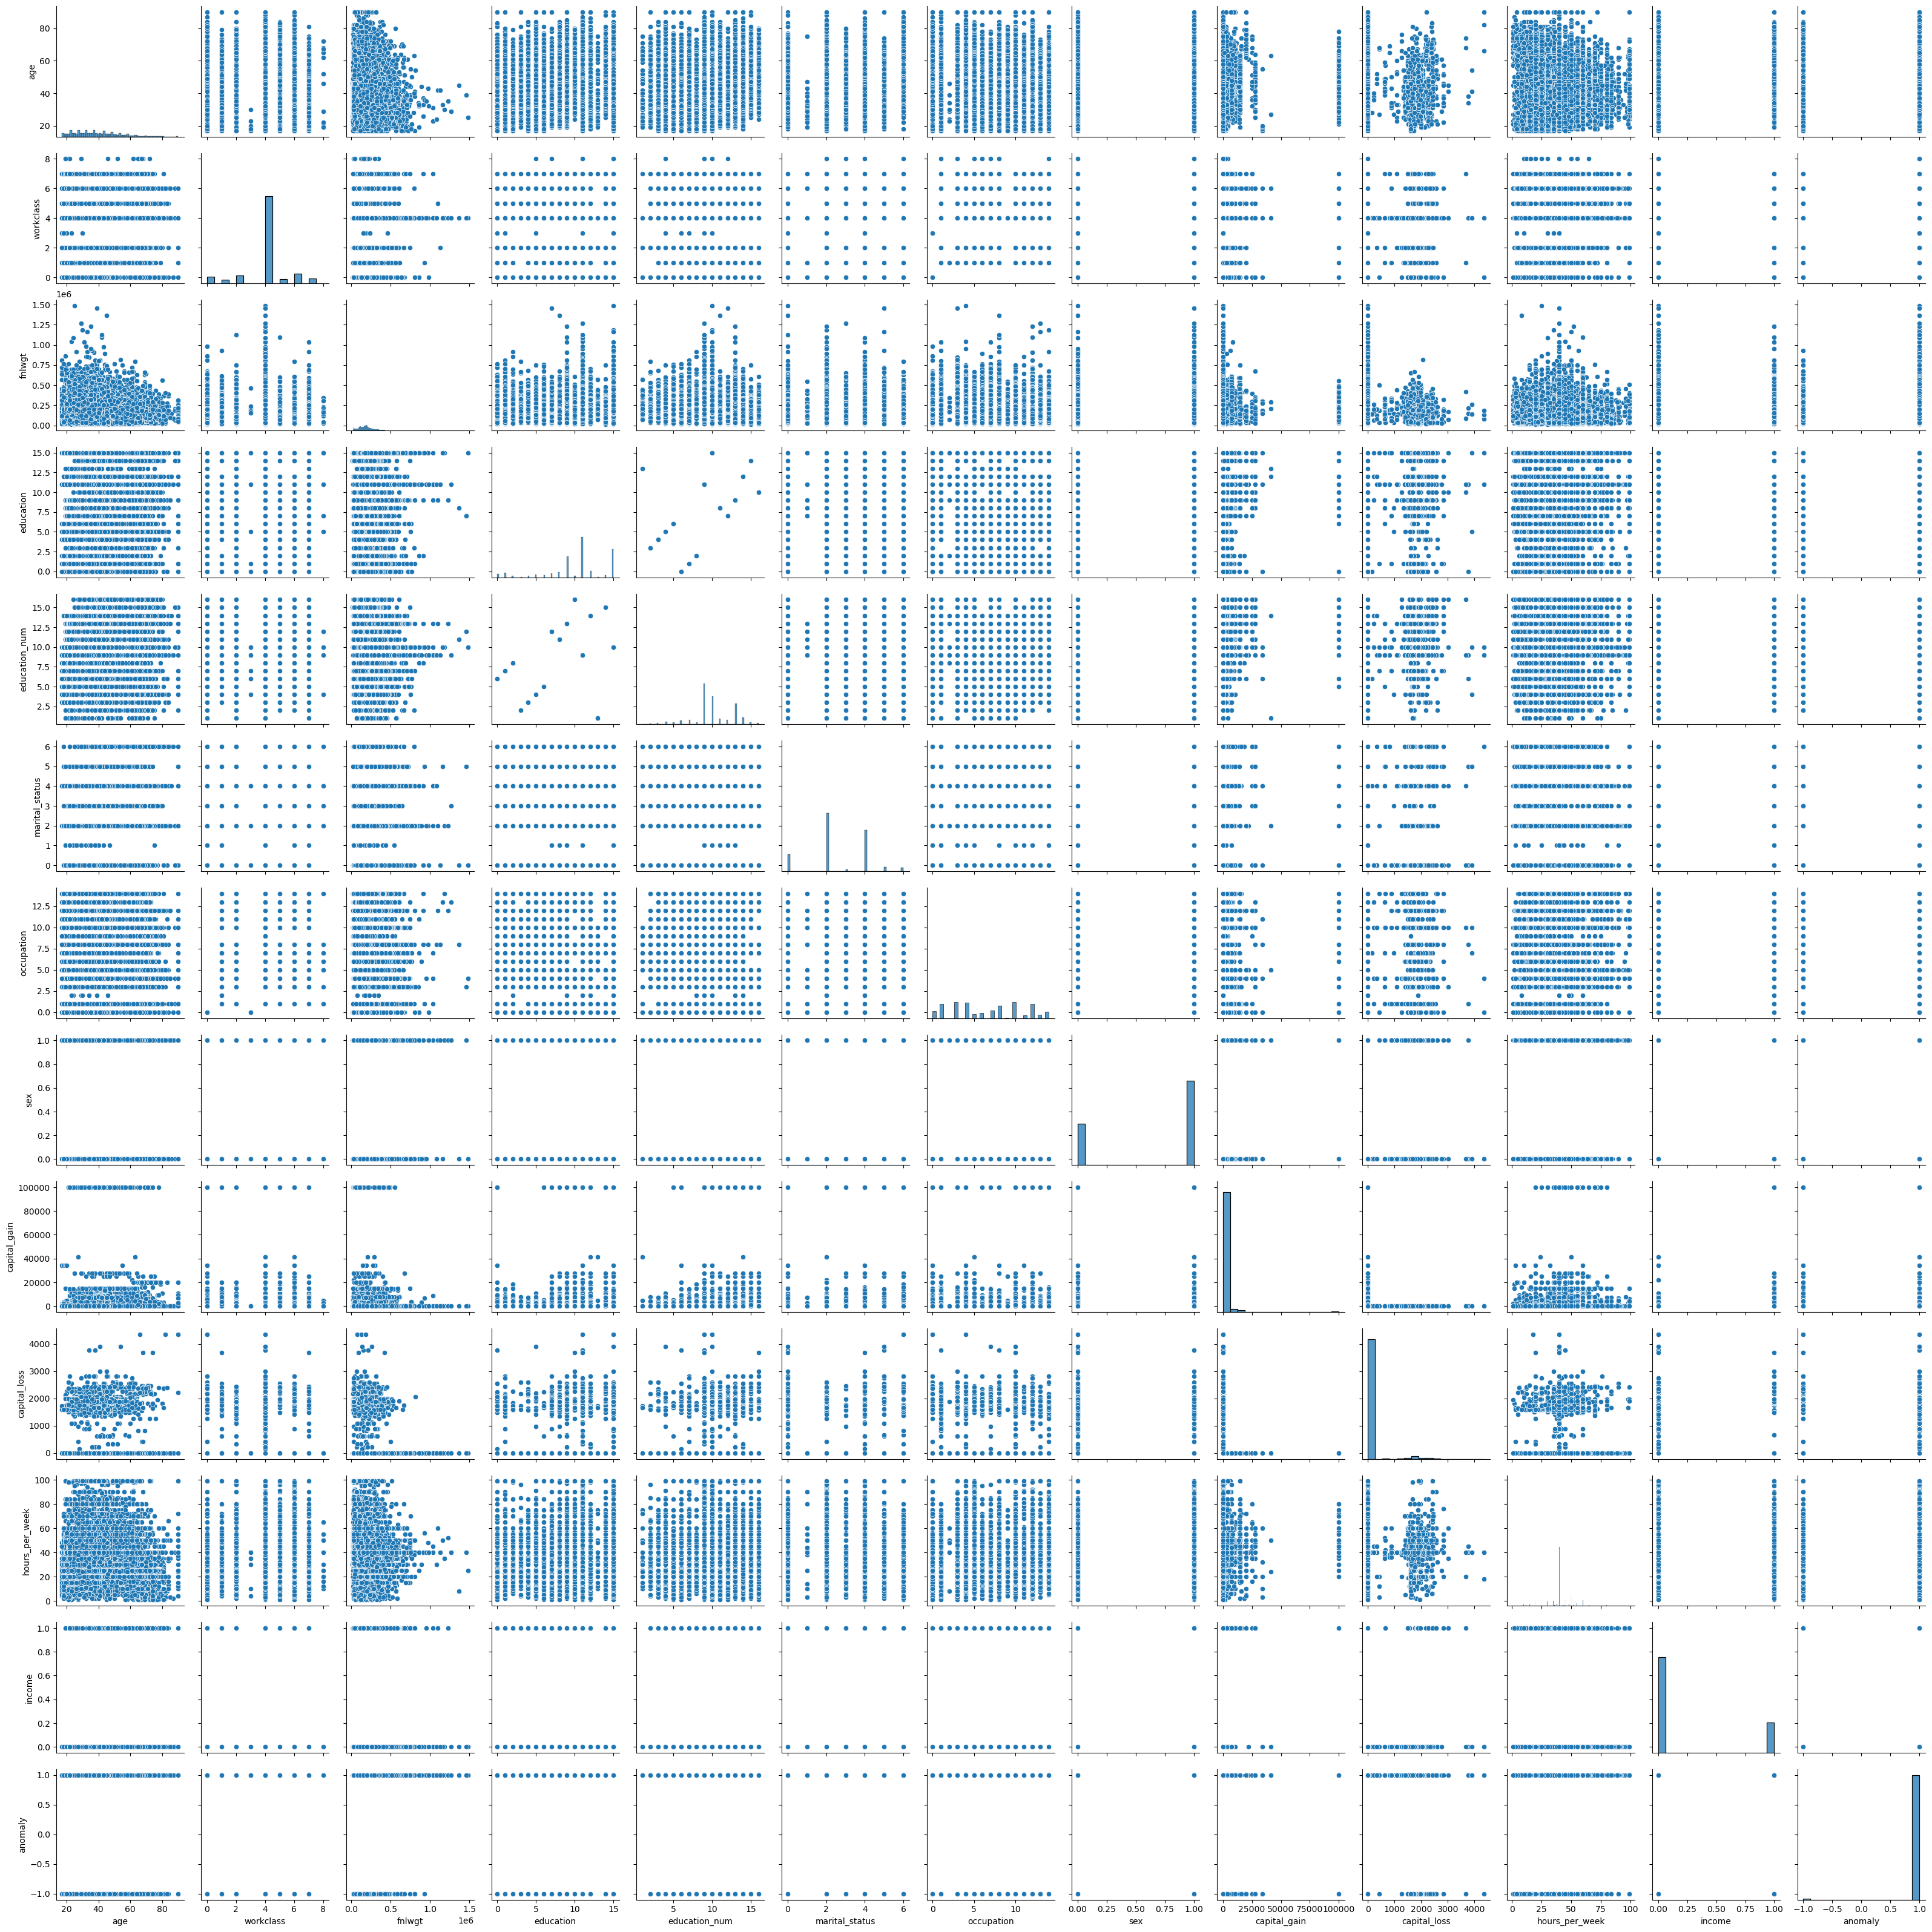

In [20]:
# Create a pairplot
sns.pairplot(Data)
plt.show()

In [21]:
#Recursive Feature Elimination
array = Data.values
X = array[:,0:11]
Y = array[:,11]
# feature extraction
model = LogisticRegression(max_iter=400)
rfe = RFE(estimator = model,n_features_to_select=5)
fit = rfe.fit(X, Y)

In [22]:
#Selected Features:
fit.support_

array([ True, False, False,  True, False,  True, False, False, False,
        True,  True])

In [23]:
#To identify what X-columns values are good to predict Y values
fit.get_feature_names_out()

array(['x0', 'x3', 'x5', 'x9', 'x10'], dtype=object)